Assignment 1

Cristian Castillo Escajadillo

1. Install PyPDF2 and py-readability-metrics

In [1]:
#%pip install py-readability-metrics
#%pip install pyPDF2

from PyPDF2 import PdfReader
from readability import Readability


2. In a new notebook, import nltk and run the following commands:

In [2]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/cristiancastilloe/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/cristiancastilloe/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/cristiancastilloe/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

3. Read the two news stories found in this assignment on Canvas. In a markdown cell in your notebook, briefly characterize the issue at hand and your impressions from a news reporting objectivity perspective.

Both articles discuss the plagiarism allegations currently facing Harvard's President, Claudine Gray. However, each article approaches the case differently.

Fox News takes a more accusatory stance, assuming Gray's guilt based on a report from a third-party source. Simultaneously, Fox News emphasizes the potential outcomes of such a scenario, suggesting that, despite the university's expectation of honesty from its students, the same standard may not apply to its faculty.

On the other hand, Reuters maintains a more neutral tone, refraining from making assumptions and simply reporting how Gray is addressing the allegations.

Both articles also mention additional allegations against Gray related to practices of antisemitism and the pressure for her to resign from her position.

4. Use PyPDF2 to extract the text out of each document

    a. Display the text

In [3]:
#FOXNEWS

foxnews = PdfReader('foxnews.pdf')
foxpage = len(foxnews.pages)
foxtext = ''

for foxpages in range(foxpage):
    text = foxnews.pages[foxpages].extract_text()
    foxtext += text + ' '
 
print(foxtext)

1 / 5Brian FloodEmbattled Harvard University President Claudine Gay hit
with more plagiarism charges
foxnews.com /media/embattled-harvard-university-president-claudine-gay-hit-more-plagiarism-charges
Media
Harvard ‘received a complaint outlining over 40 allegations of
plagiarism,’ according to the Free Beacon
 By Brian Flood  Fox News
Published December 20, 2023 12:59pm EST
Harvard president facing 40 new allegations of plagiarism
Fox News' Molly Line reports the latest on the allegations. 
Embattled Harvard University President Claudine Gay  has been slapped with additional
charges of plagiarism. 
The Washington Free Beacon  reported Harvard "received a complaint outlining over 40
allegations of plagiarism" against Gay on T uesday , noting a letter was sent to Harvard's
research integrity of ficer, Stacey Springs, outlining the claims. 
"The document paints a picture of a pattern of misconduct more extensive than has been
previously reported and puts the Harvard Corporation, the unive

In [4]:
#REUTERS

reuters = PdfReader('reuters.pdf')
reuterspage = len(reuters.pages)
reuterstext = ''

for reuterspages in range(reuterspage):
    text = reuters.pages[reuterspages].extract_text()
    reuterstext += text + ' '
 
print(reuterstext)

1 / 3Gabriella BorterHarvard president will submit dissertation edits after
plagiarism allegations
reuters.com /world/us/embattled-harvard-president-will-submit-dissertation-edits-after-plagiarism-2023-12-21
Harvard University President Claudine Gay testifies before a House Education and The
Workforce Committee hearing titled "Holding Campus Leaders Accountable and Confronting
Antisemitism" on Capitol Hill in W ashington, U.S., December 5, 2023. REUTERS/Ken
Cedeno/File Photo Acquire Licensing Rights
Dec 21 (Reuters) - Harvard University's president was planning to submit three corrections to
her 1997 dissertation after a committee investigating plagiarism allegations against her found
that she had made citation errors, a university spokesperson said.
Claudine Gay , who was inaugurated as Harvard's president in September , has already
submitted corrections to two published articles in recent weeks that were the focus of a
review by the Harvard Corporation, the university's governing boa

b. Briefly note any anomalies in your notebook.

The subheadings in the Fox News article are formatted with spaces between letters, which deviates from the original file's presentation.

Additionally, both texts contain extracted information that is not useful for the analysis. For example, the phrase 'Advertisement. Scroll to continue' appears repeatedly in the Reuters text.

5. Use NLTK to complete sentiment analysis for each of the articles.

In [5]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [6]:
#FOXNEWS

siafoxnews = SentimentIntensityAnalyzer()
scoresfoxnews = siafoxnews.polarity_scores(foxtext)
print(scoresfoxnews)

{'neg': 0.064, 'neu': 0.863, 'pos': 0.073, 'compound': 0.8346}


In [7]:
#REUTERS

siareuters = SentimentIntensityAnalyzer()
scoresreuters = siareuters.polarity_scores(reuterstext)
print(scoresreuters)

{'neg': 0.07, 'neu': 0.904, 'pos': 0.026, 'compound': -0.9719}


a. Compare the results from the two articles

Fox News has a positive overall sentiment with a compound score of 0.8346.

Reuters has a strongly negative overall sentiment with a compound score of -0.9719.

b. Compare the results to your reading of the articles; do you agree with the outcome?

I disagree with the outcome of the sentiment analysis as it is completely opposite to my description on question 3.

6. Run sentiment analysis on the article headlines

In [8]:
#FOXNEWS

sia = SentimentIntensityAnalyzer()

foxnews_title = 'Embattled Harvard University President Claudine Gay hit with more plagiarism charges'
foxnews_title_sia = sia.polarity_scores(foxnews_title)
print(foxnews_title_sia)

{'neg': 0.192, 'neu': 0.808, 'pos': 0.0, 'compound': -0.3353}


In [9]:
#REUTERS

reuters_title = 'Harvard president will submit dissertation edits after plagiarism allegations'
reuters_title_sia = sia.polarity_scores(reuters_title)
print(reuters_title_sia)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


a. Do those results agree with the overall sentiment?

There is a disagreement between the headline sentiment and the overall sentiment in both cases.

For Fox News the sentiment analysis on headlines suggests a negative sentiment. While for Reuters it suggests a neutral sentiment.


7. Using py-readability-metrics complete 2-3 different readability scores

In [26]:
from readability import Readability
from readability.exceptions import ReadabilityException

def compute_readability_scores(text, source_name):
    try:
     
        readability = Readability(text)

        flesch_score = readability.flesch()
        gunning_fog_score = readability.gunning_fog()

        # Print the results
        print(f"{source_name} - Flesch Reading Ease Score: {flesch_score.score}")
        print(f"{source_name} - Gunning Fog Score: {gunning_fog_score.score}")
        print()
        
        return {
            'Flesch Reading Ease Score': flesch_score.score,
            'Gunning Fog Score': gunning_fog_score.score
        }
    except ReadabilityException as e:
        return {'Error': str(e)}

foxnews_scores = compute_readability_scores(foxtext, 'Fox News')
reuters_scores = compute_readability_scores(reuterstext, 'Reuters')


Fox News - Flesch Reading Ease Score: 21.41115320671068
Fox News - Gunning Fog Score: 21.868487077434633

Reuters - Flesch Reading Ease Score: 18.384675005023126
Reuters - Gunning Fog Score: 18.87116736990155



a. Discuss what the chosen metric is measuring
b. Compare the scores from both articles

The Flesch Reading Ease Score is a readability metric that quantifies how easy or difficult it is to comprehend a piece of text. The scale ranges from 0 to 100, with higher scores indicating easier readability.

Both articles fall into the "Difficult" category on the Flesch Reading Ease scale, and they could be described as 'Very Confusing,' with Fox News slightly higher at 21.41 compared to Reuters at 18.38.

While the Flesch Reading Ease Score emphasizes overall readability, the Gunning Fog Score provides an estimate of the educational background required to understand the content. The scale starts from the category '6 and below', suggesting an elementary school level, gradually ascending to the category '17 and above', which demands a graduate level of studies.

The Gunning Fog Scores suggest that both articles are written at a level that exceeds typical educational levels. Fox News has a slightly higher score than Reuters, indicating a more advanced reading level.

8. Using wordcloud, create word clouds for both articles

In [10]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

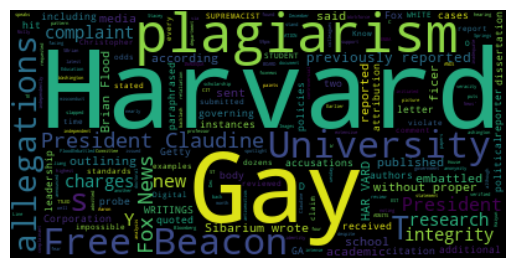

In [11]:
#FOXNEWS

stopwords = set(STOPWORDS)
foxnews_cloud = WordCloud(stopwords=stopwords)


foxnews_cloud.generate(foxtext)
plt.imshow(foxnews_cloud, interpolation='bilinear')
plt.axis('off')  
plt.show()

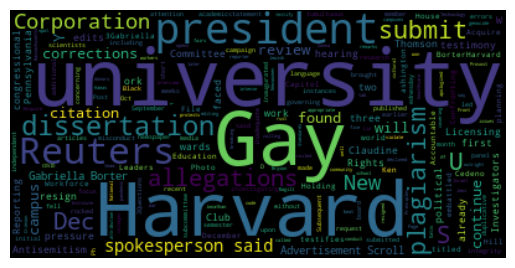

In [12]:
#REUTERS

stopwords = set(STOPWORDS)
reuters_cloud = WordCloud(stopwords=stopwords)


reuters_cloud.generate(reuterstext)
plt.imshow(reuters_cloud, interpolation='bilinear')
plt.axis('off')  
plt.show()

a. Briefly comment on the word clouds

In general, the word clouds display similar results, featuring words such as 'Gay' and 'Harvard'. However, a notable distinction is that Fox News emphasizes the word 'Plagiarism', whereas Reuters includes more neutral terms like 'University' or 'President'. It's also important to point out that in the word cloud for Fox News, 'Free Beacon', their source of information for the article, is highlighted, whereas Reuters highlights 'Reuters'.